# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
 
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config info

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "APPID=" + api_key + "&units=" + units + "&q="

lat = []
temp_max = []
humidity = []
cloudiness = []
windiness = []

#cities = ['Paris','Moscow','New York','Minneapolis','Bismarck','Casper','Denver','Sydney','Portland']
#city = []


print('Beginning Data Retrieval')
print('-----------------------------------------')


#Build query
for city in cities:
    
    #time delay
    time.sleep(1.001)
    
    #Get weather data
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()

    try:
        lat.append(weather_json['coord']['lat'])
        temp_max.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windiness.append(weather_json['wind']['speed'])

    except KeyError:
        print("City not found.  Skipping... ")
    
    print(f"Processing data for city = {city}.")


Beginning Data Retrieval
-----------------------------------------
Processing data for city = ushuaia.
Processing data for city = georgetown.
Processing data for city = punta arenas.
Processing data for city = tiksi.
Processing data for city = tunceli.
Processing data for city = yellowknife.
Processing data for city = itamaraca.
Processing data for city = miraflores.
Processing data for city = hithadhoo.
Processing data for city = saskylakh.
Processing data for city = pokhara.
Processing data for city = bluff.
Processing data for city = hobart.
Processing data for city = kalawit.
City not found.  Skipping... 
Processing data for city = illoqqortoormiut.
City not found.  Skipping... 
Processing data for city = krasnoselkup.
Processing data for city = yilan.
Processing data for city = lavrentiya.
Processing data for city = nueva loja.
Processing data for city = curup.
Processing data for city = shasta lake.
Processing data for city = cabedelo.
Processing data for city = puntarenas.
Proce

City not found.  Skipping... 
Processing data for city = wulanhaote.
Processing data for city = panaba.
Processing data for city = geraldton.
Processing data for city = west plains.
Processing data for city = muros.
Processing data for city = sorong.
City not found.  Skipping... 
Processing data for city = grand river south east.
Processing data for city = souillac.
Processing data for city = osoyoos.
Processing data for city = estelle.
Processing data for city = tiarei.
Processing data for city = bethel.
Processing data for city = chuy.
Processing data for city = sisimiut.
Processing data for city = kamiiso.
Processing data for city = tautira.
City not found.  Skipping... 
Processing data for city = mys shmidta.
Processing data for city = jumla.
Processing data for city = sur.
Processing data for city = ogori.
City not found.  Skipping... 
Processing data for city = rungata.
Processing data for city = hansot.
Processing data for city = dikson.
Processing data for city = progreso.
Proc

Processing data for city = alim.
Processing data for city = fayaoue.
Processing data for city = ambulu.
Processing data for city = mazara del vallo.
Processing data for city = kudahuvadhoo.
Processing data for city = bayangol.
Processing data for city = marawi.
Processing data for city = padang.
Processing data for city = kalmunai.
Processing data for city = harper.
Processing data for city = ljungby.
Processing data for city = anadyr.
Processing data for city = buala.
Processing data for city = duluth.
City not found.  Skipping... 
Processing data for city = mrirt.
Processing data for city = bhanpuri.
Processing data for city = omboue.
Processing data for city = nemuro.
Processing data for city = snezhnogorsk.
Processing data for city = luderitz.
Processing data for city = tazovskiy.
Processing data for city = nadym.
Processing data for city = launceston.
Processing data for city = inta.
Processing data for city = marigot.
Processing data for city = huarmey.
Processing data for city =

Processing data for city = manggar.
Processing data for city = deputatskiy.
Processing data for city = mocoa.
Processing data for city = yar-sale.
Processing data for city = boissevain.
Processing data for city = gat.
City not found.  Skipping... 
Processing data for city = sembe.
Processing data for city = anchorage.
Processing data for city = hambantota.
Processing data for city = senador jose porfirio.
Processing data for city = galle.
Processing data for city = saint-ambroise.
Processing data for city = solnechnyy.
Processing data for city = pauini.
Processing data for city = taitung.
Processing data for city = orcotuna.
Processing data for city = colomi.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_transposed = zip(lat,temp_max,humidity,cloudiness,windiness)
weather_df = pd.DataFrame(weather_transposed, columns=['Latitude','Max Temperature',
                                                       'Humidity','Cloudiness','Windiness'])

weather_df.to_csv('city_data.csv')

weather_df

,Latitude,Max Temperature,Humidity,Cloudiness,Windiness
0,-54.81,42.80,56,40,11.41
1,6.80,89.60,62,20,11.41
2,-53.16,46.40,63,40,39.15
3,71.64,20.12,95,100,7.53
4,39.11,66.20,44,100,4.70
...,...,...,...,...,...
571,50.72,26.60,48,0,5.17
572,-7.71,72.86,94,96,1.88
573,22.76,59.18,92,47,2.96
574,-11.97,56.30,32,0,7.83


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

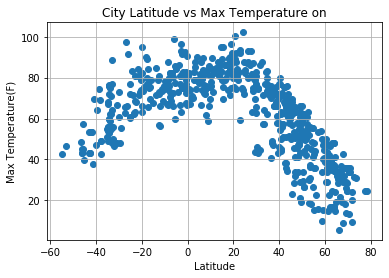

In [7]:
# Build a scatter plot for Latitude vs Max Temp
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature on")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

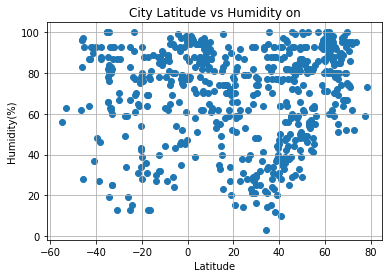

In [8]:
# Build a scatter plot for Latitude vs Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity on")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

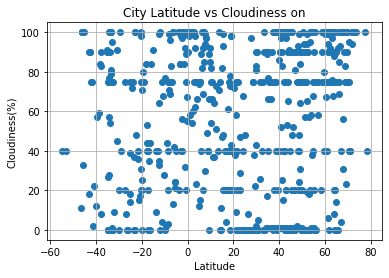

In [10]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness on")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

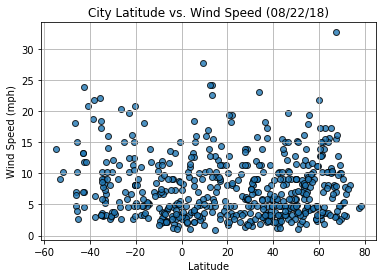